In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn import tree
from sklearn.model_selection import train_test_split

## Se importa el dataset
Se lee el dataset con read_excel, seleccionando la hoja "Data 1"
el dataset se puede encontrar en:


https://www.eia.gov/dnav/pet/pet_pri_gnd_dcus_nus_w.htm

In [24]:
df = pd.read_excel('PET_PRI_GND_DCUS_NUS_W.xls',header=2, sheet_name="Data 1", )
df.columns= ['Date', 'A1', 'A2', 'A3', 'R1', 'R2', 'R3', 'M1', 'M2', 'M3', 'P1', 'P2', 'P3', 'D1', 'D2', 'D3']
df.drop(labels=['D1','D2','D3'], axis=1, inplace=True)
df.head(5)

,Date,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3
0,1990-08-20,NaN,NaN,NaN,1.191,1.191,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1990-08-27,NaN,NaN,NaN,1.245,1.245,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1990-09-03,NaN,NaN,NaN,1.242,1.242,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1990-09-10,NaN,NaN,NaN,1.252,1.252,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1990-09-17,NaN,NaN,NaN,1.266,1.266,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Limpiar valores nulos
Se puede observar que hay muchos valores nulos, por lo que se va a comprobar con el metodo isnull y posteriormente se van a eliminar los registros con todos los valores nulos, ya que no todos los años registraban todos los campos.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1686 non-null   datetime64[ns]
 1   A1      1549 non-null   float64       
 2   A2      1463 non-null   float64       
 3   A3      1463 non-null   float64       
 4   R1      1680 non-null   float64       
 5   R2      1680 non-null   float64       
 6   R3      1463 non-null   float64       
 7   M1      1463 non-null   float64       
 8   M2      1463 non-null   float64       
 9   M3      1463 non-null   float64       
 10  P1      1463 non-null   float64       
 11  P2      1463 non-null   float64       
 12  P3      1463 non-null   float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 171.4 KB


In [26]:
df.isnull().any()

Date    False
A1       True
A2       True
A3       True
R1       True
R2       True
R3       True
M1       True
M2       True
M3       True
P1       True
P2       True
P3       True
dtype: bool

In [27]:
df.dropna(inplace=True)
df.isnull().any()

Date    False
A1      False
A2      False
A3      False
R1      False
R2      False
R3      False
M1      False
M2      False
M3      False
P1      False
P2      False
P3      False
dtype: bool

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1463 entries, 223 to 1685
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1463 non-null   datetime64[ns]
 1   A1      1463 non-null   float64       
 2   A2      1463 non-null   float64       
 3   A3      1463 non-null   float64       
 4   R1      1463 non-null   float64       
 5   R2      1463 non-null   float64       
 6   R3      1463 non-null   float64       
 7   M1      1463 non-null   float64       
 8   M2      1463 non-null   float64       
 9   M3      1463 non-null   float64       
 10  P1      1463 non-null   float64       
 11  P2      1463 non-null   float64       
 12  P3      1463 non-null   float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 160.0 KB


## Precio mas caro

Para darnos una idea de los precios vamos a tomar el registro con los valores mas altos y veremos la diferencia de precio entre grados

In [29]:
df.loc[-1] = df.max(axis=0) 

In [30]:
top_1 = df.tail(1)
top_1

,Date,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3
-1,2022-12-05,5.107,4.916,5.491,5.006,4.844,5.362,5.455,5.191,5.858,5.762,5.513,6.064


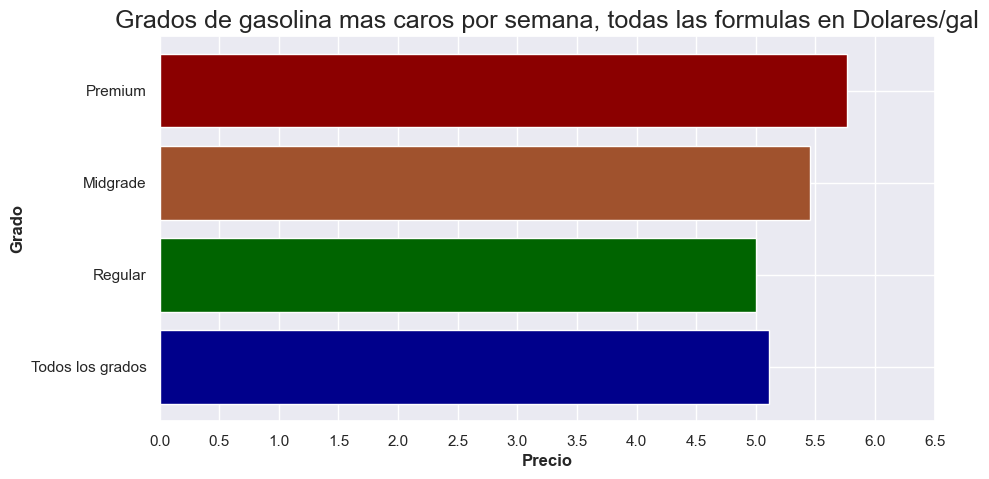

In [31]:
plt.figure(figsize= (10,5))
sns.set_style("darkgrid")
plt.barh('Todos los grados', top_1['A1'], color = 'darkblue')
plt.barh('Regular', top_1['R1'], color = 'darkgreen')
plt.barh('Midgrade', top_1['M1'], color = 'sienna')
plt.barh('Premium', top_1['P1'], color = 'darkred')
plt.xticks(np.arange(0, 7, step=0.5))
plt.title("Grados de gasolina mas caros por semana, todas las formulas en Dolares/gal", fontsize = 18)
plt.ylabel('Grado', fontsize = 12, fontweight = 'bold')
plt.xlabel("Precio", fontsize = 12, fontweight = 'bold')
plt.show()

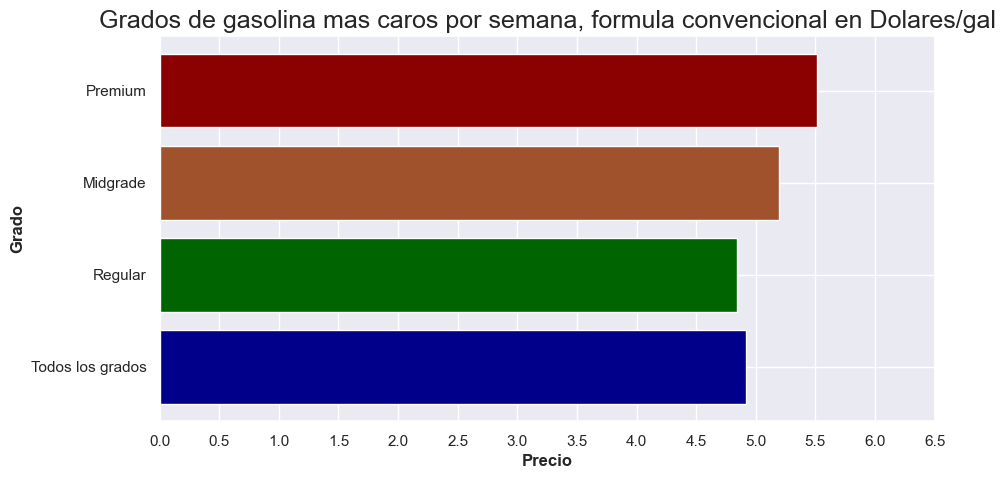

In [32]:
plt.figure(figsize= (10,5))
sns.set_style("darkgrid")
plt.barh('Todos los grados', top_1['A2'], color = 'darkblue')
plt.barh('Regular', top_1['R2'], color = 'darkgreen')
plt.barh('Midgrade', top_1['M2'], color = 'sienna')
plt.barh('Premium', top_1['P2'], color = 'darkred')
plt.xticks(np.arange(0, 7, step=0.5))
plt.title("Grados de gasolina mas caros por semana, formula convencional en Dolares/gal", fontsize = 18)
plt.ylabel('Grado', fontsize = 12, fontweight = 'bold')
plt.xlabel("Precio", fontsize = 12, fontweight = 'bold')
plt.show()

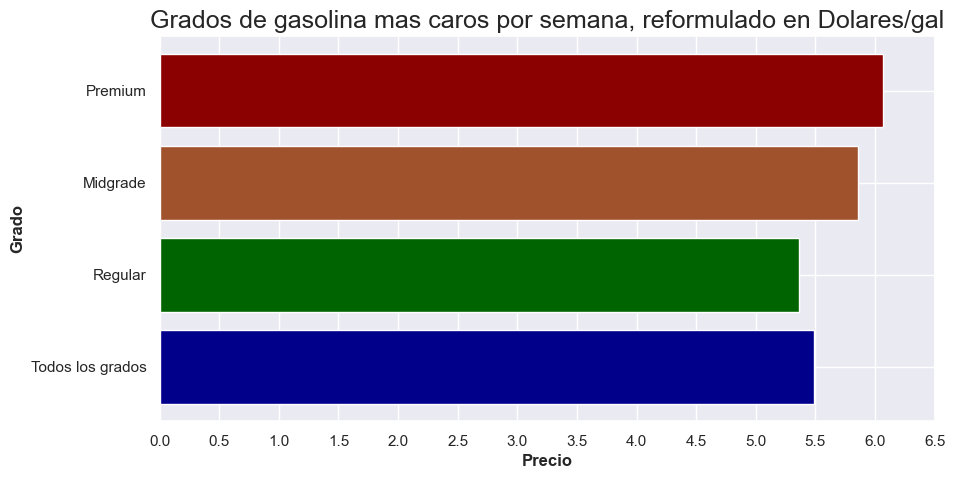

In [33]:
plt.figure(figsize= (10,5))
sns.set_style("darkgrid")
plt.barh('Todos los grados', top_1['A3'], color = 'darkblue')
plt.barh('Regular', top_1['R3'], color = 'darkgreen')
plt.barh('Midgrade', top_1['M3'], color = 'sienna')
plt.barh('Premium', top_1['P3'], color = 'darkred')
plt.xticks(np.arange(0, 7, step=0.5))
plt.title("Grados de gasolina mas caros por semana, reformulado en Dolares/gal", fontsize = 18)
plt.ylabel('Grado', fontsize = 12, fontweight = 'bold')
plt.xlabel("Precio", fontsize = 12, fontweight = 'bold')
plt.show()

## Vamos a ver el precio promedio anual y el incremento año con año

In [34]:
dfYear = df
dfYear['year'] = pd.DatetimeIndex(dfYear['Date']).year
dfYear.drop(-1, inplace = True)
dfYear

,Date,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3,year
223,1994-11-28,1.117,1.175,1.259,1.105,1.082,1.149,1.197,1.174,1.249,1.303,1.270,1.351,1994
224,1994-12-05,1.127,1.143,1.254,1.103,1.075,1.169,1.197,1.167,1.272,1.301,1.260,1.370,1994
225,1994-12-12,1.131,1.118,1.231,1.095,1.064,1.167,1.188,1.156,1.268,1.288,1.244,1.363,1994
226,1994-12-19,1.134,1.099,1.216,1.087,1.056,1.167,1.179,1.147,1.262,1.279,1.233,1.360,1994
227,1994-12-26,1.125,1.088,1.213,1.077,1.044,1.165,1.171,1.136,1.265,1.270,1.222,1.358,1994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,2022-11-07,3.909,3.708,4.312,3.796,3.628,4.162,4.296,4.003,4.735,4.641,4.368,4.968,2022
1682,2022-11-14,3.876,3.688,4.253,3.762,3.606,4.102,4.270,3.996,4.687,4.615,4.364,4.920,2022
1683,2022-11-21,3.763,3.582,4.126,3.648,3.498,3.973,4.167,3.901,4.568,4.507,4.265,4.800,2022
1684,2022-11-28,3.649,3.473,3.997,3.534,3.389,3.848,4.053,3.802,4.432,4.383,4.157,4.657,2022


In [35]:
yearly_avg = dfYear.groupby('year').mean(numeric_only=True)
yearly_avg = yearly_avg.reset_index()
yearly_avg

,year,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3
0,1994,1.126800,1.124600,1.234600,1.093400,1.064200,1.163400,1.186400,1.156000,1.263200,1.288200,1.245800,1.360400
1,1995,1.157712,1.143538,1.219615,1.110865,1.103308,1.162500,1.200635,1.196000,1.284904,1.297981,1.287154,1.368846
2,1996,1.244528,1.230830,1.296849,1.199075,1.191925,1.241792,1.285170,1.280151,1.363962,1.380642,1.370679,1.438057
3,1997,1.244250,1.227788,1.306808,1.199038,1.188692,1.252327,1.284192,1.276712,1.377269,1.380058,1.368481,1.446981
4,1998,1.071712,1.056212,1.133135,1.029654,1.016654,1.077788,1.121904,1.105885,1.201058,1.213865,1.198788,1.275692
5,1999,1.176058,1.155519,1.260154,1.135808,1.115981,1.195154,1.233596,1.207019,1.331115,1.319635,1.296558,1.399692
6,2000,1.522731,1.500692,1.605135,1.483808,1.462308,1.542865,1.576462,1.548750,1.670308,1.662942,1.639385,1.741250
7,2001,1.460302,1.422019,1.548849,1.420057,1.383830,1.498415,1.513283,1.467792,1.615226,1.602472,1.561396,1.691623
8,2002,1.385962,1.352212,1.452885,1.344500,1.312673,1.408423,1.439423,1.399212,1.516654,1.530154,1.495731,1.593981
9,2003,1.603019,1.554577,1.700635,1.561096,1.515808,1.654712,1.658231,1.600615,1.769558,1.747808,1.697365,1.841942


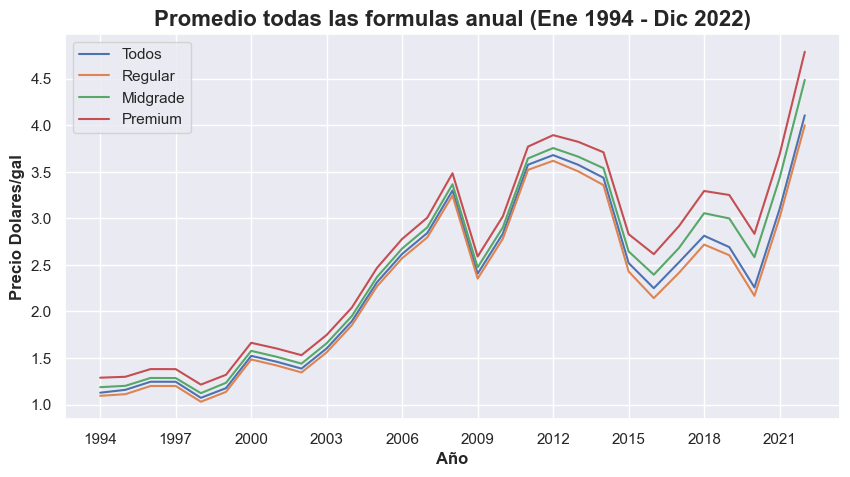

In [36]:
plt.figure(figsize= (10,5))
sns.set_style("darkgrid")
plt.plot(yearly_avg['year'], yearly_avg['A1'])
plt.plot(yearly_avg['year'], yearly_avg['R1'])
plt.plot(yearly_avg['year'], yearly_avg['M1'])
plt.plot(yearly_avg['year'], yearly_avg['P1'])
plt.xticks(np.arange(1994, 2022, step=3))
plt.legend(['Todos','Regular','Midgrade','Premium'], loc = 'upper left')
plt.title("Promedio todas las formulas anual (Ene 1994 - Dic 2022)",fontsize = 16, fontweight = 'bold')
plt.xlabel("Año",fontsize = 12, fontweight = 'bold')
plt.ylabel("Precio Dolares/gal",fontsize = 12, fontweight = 'bold')
plt.show()

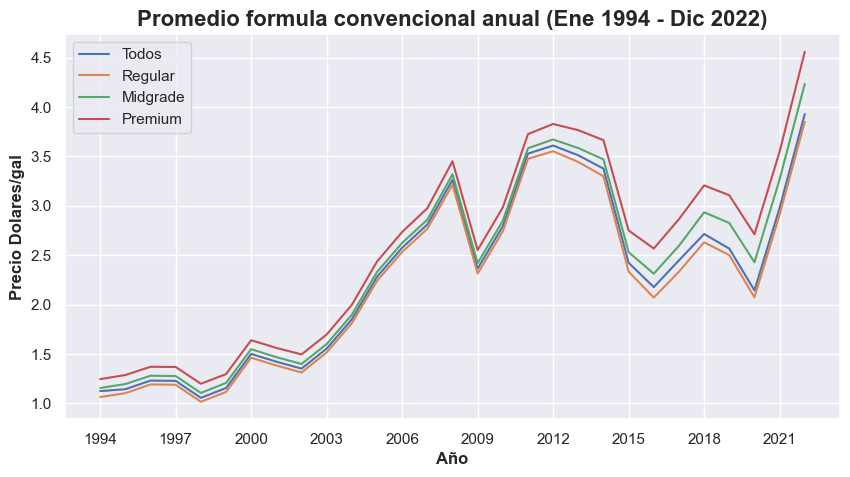

In [37]:
plt.figure(figsize= (10,5))
sns.set_style("darkgrid")
plt.plot(yearly_avg['year'], yearly_avg['A2'])
plt.plot(yearly_avg['year'], yearly_avg['R2'])
plt.plot(yearly_avg['year'], yearly_avg['M2'])
plt.plot(yearly_avg['year'], yearly_avg['P2'])
plt.xticks(np.arange(1994, 2022, step=3))
plt.legend(['Todos','Regular','Midgrade','Premium'], loc = 'upper left')
plt.title("Promedio formula convencional anual (Ene 1994 - Dic 2022)",fontsize = 16, fontweight = 'bold')
plt.xlabel("Año",fontsize = 12, fontweight = 'bold')
plt.ylabel("Precio Dolares/gal",fontsize = 12, fontweight = 'bold')
plt.show()

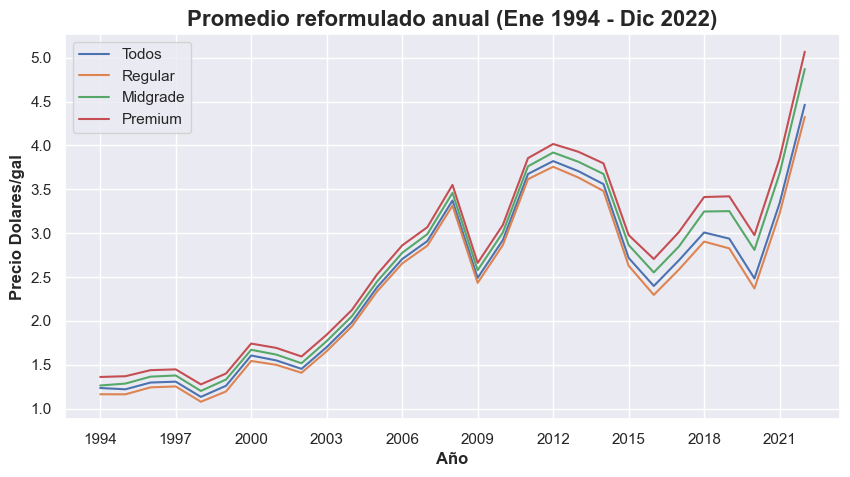

In [38]:
plt.figure(figsize= (10,5))
sns.set_style("darkgrid")
plt.plot(yearly_avg['year'], yearly_avg['A3'])
plt.plot(yearly_avg['year'], yearly_avg['R3'])
plt.plot(yearly_avg['year'], yearly_avg['M3'])
plt.plot(yearly_avg['year'], yearly_avg['P3'])
plt.xticks(np.arange(1994, 2022, step=3))
plt.legend(['Todos','Regular','Midgrade','Premium'], loc = 'upper left')
plt.title("Promedio reformulado anual (Ene 1994 - Dic 2022)",fontsize = 16, fontweight = 'bold')
plt.xlabel("Año",fontsize = 12, fontweight = 'bold')
plt.ylabel("Precio Dolares/gal",fontsize = 12, fontweight = 'bold')
plt.show()

## Preparar datos

Vamos a predecir el valor promedio de todos los grados combinas ya que resulta lo mas representativo del mercado.

In [39]:
X, y = yearly_avg.drop(['A1'], axis=1), yearly_avg['A1']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [41]:
clf = tree.DecisionTreeRegressor(min_samples_split=2)
clf = clf.fit(X_train, y_train)

In [42]:
clf.score(X_test,y_test)

0.7179418673551057

In [43]:
y_pred = clf.predict(X)

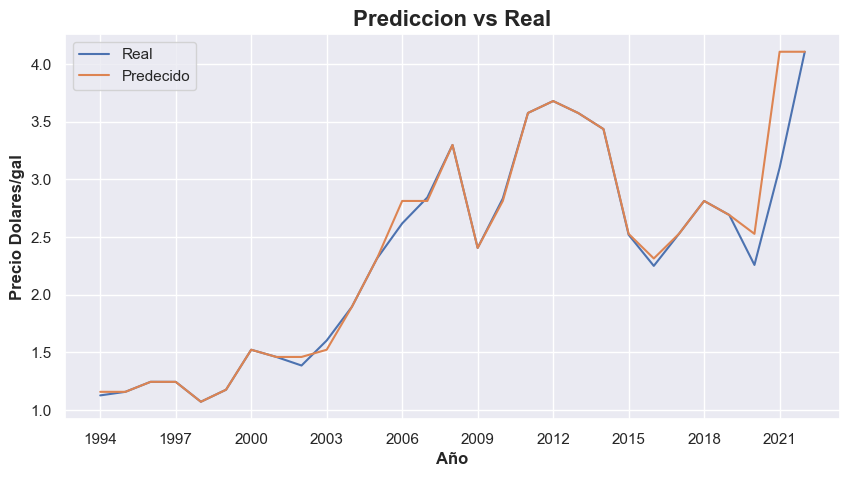

In [44]:
plt.figure(figsize= (10,5))
sns.set_style("darkgrid")
plt.plot(yearly_avg['year'], y)
plt.plot(yearly_avg['year'], y_pred)
plt.xticks(np.arange(1994, 2022, step=3))
plt.legend(['Real','Predecido'], loc = 'upper left')
plt.title("Prediccion vs Real",fontsize = 16, fontweight = 'bold')
plt.xlabel("Año",fontsize = 12, fontweight = 'bold')
plt.ylabel("Precio Dolares/gal",fontsize = 12, fontweight = 'bold')
plt.show()